In [94]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import os

In [4]:
#extracting critical properties of the image

In [8]:
def img_data(imgPath,disp=True):
    orig_img =  Image.open(imgPath)
    
    img_size_kb = os.stat(imgPath).st_size/1024
    data =  orig_img.getdata()
    ori_pixels=np.array(data).reshape(*orig_img.size,-1)
    img_dim = ori_pixels.shape
    
    
    if disp:
        plt.imshow(orig_img)
        plt.show()
        
        
    data_dict = {}
    data_dict['img_size_kb'] = img_size_kb
    data_dict['img_dim'] = img_dim
    
    return data_dict

In [30]:
#computing pc for the inputs

def pca_compose(imgPath):
    orig_img = Image.open(imgPath) #reading the image
    img=np.array(orig_img.getdata()) #converting the reading into 2d array
    orig_img_size = orig_img.size
    img = img.reshape(*orig_img_size,-1) #reshaping 2d to 3d array
    
    pca_channel = {}
    img_t=np.transpose(img) #transposing the image
    
    for i in range(img.shape[-1]):
        per_channel = img_t[i]
        channel = img_t[i].reshape(*img.shape[:-1])
        
        pca=PCA(random_state=42)
        
        fit_pca=pca.fit_transform(channel)
        
        pca_channel[i]=(pca,fit_pca)
    return pca_channel

In [10]:
#Lossless reconstruction of the image using a reduced number of components

In [90]:
#function to select the desired no of components
def pca_transform(pca_channel, n_components):
    temp_res = []

    for channel in range(len(pca_channel)):
        pca, fit_pca = pca_channel[channel]

        # Selecting PCA components and scaling them
        pca_pixel = fit_pca[:, :n_components]
        pca_comp = pca.components_[:n_components, :] * np.sqrt(pca.explained_variance_[:n_components])[:, np.newaxis]

        # Reconstructing compressed pixels
        compressed_pixel = np.dot(pca_pixel, pca_comp) + pca.mean_

        temp_res.append(compressed_pixel)

    compressed_image = np.transpose(temp_res)
    compressed_image = np.clip(compressed_image, 0, 255).astype(np.uint8)  # Ensure image is in valid range

    return compressed_image


In [77]:
imgPath="dswallpaper.jpg"

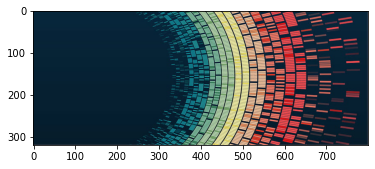

{'img_size_kb': 64.5205078125, 'img_dim': (800, 320, 3)}

In [78]:
img_data(imgPath)

In [88]:
pca_channel=pca_compose(imgPath)
n_components=int(input("Enter the no. of components u want to retain"))

Enter the no. of components u want to retain50


In [91]:
compressed_image=pca_transform(pca_channel,n_components)

In [92]:
print(compressed_image.shape)
print(compressed_image.dtype)


(320, 800, 3)
uint8


In [93]:
def visualize_image(image):
    # Ensure the image is in the valid range [0, 255]
    image = np.clip(image, 0, 255).astype(np.uint8)

    # Create an Image object from the NumPy array
    img = Image.fromarray(image)

    # Display the image
    img.show()

visualize_image(compressed_image)
